In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

from knn import KNN

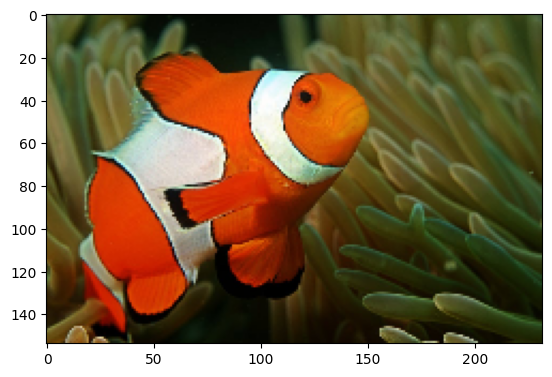

In [2]:
nemo = cv2.imread("input/nemo.jpg")
nemo = cv2.resize(nemo, (0, 0), fx=0.25, fy=0.25)
nemo = cv2.cvtColor(nemo, cv2.COLOR_BGR2RGB)
plt.imshow(nemo)
plt.show()

In [3]:
nemo.shape

(154, 232, 3)

In [4]:
pixels_list_rgb = nemo.reshape(-1, 3)
pixels_list_rgb.shape

(35728, 3)

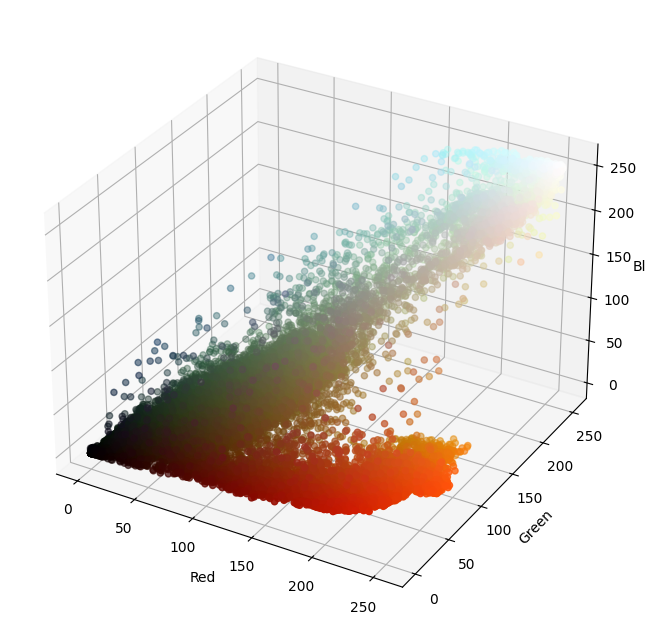

In [5]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection='3d')

ax.scatter(pixels_list_rgb[:, 0], pixels_list_rgb[:, 1], pixels_list_rgb[:, 2], c=pixels_list_rgb / 255)
ax.set_xlabel('Red')
ax.set_ylabel('Green')
ax.set_zlabel('Blue')
plt.show()

In [6]:
nemo_hsv = cv2.cvtColor(nemo, cv2.COLOR_RGB2HSV)
pixels_list_hsv = nemo_hsv.reshape(-1, 3)

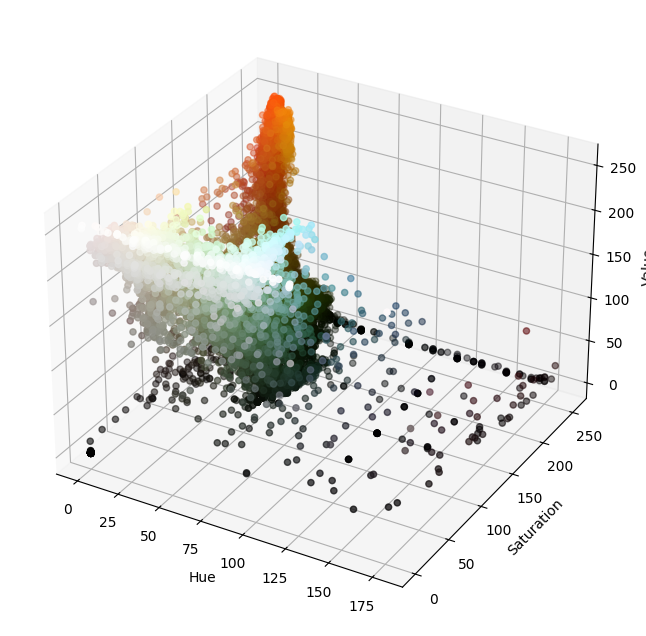

In [7]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection='3d')

ax.scatter(pixels_list_hsv[:, 0], pixels_list_hsv[:, 1], pixels_list_hsv[:, 2], c=pixels_list_rgb / 255)
ax.set_xlabel('Hue')
ax.set_ylabel('Saturation')
ax.set_zlabel('Value')
plt.show()

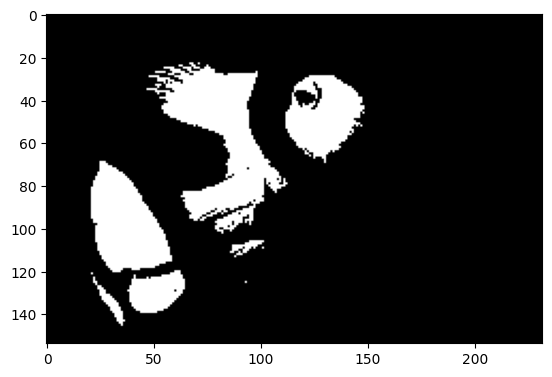

In [8]:
light_orange = (1, 190, 200)
dark_orange = (18, 255, 255)

mask_orange = cv2.inRange(nemo_hsv, light_orange, dark_orange)
plt.imshow(mask_orange, cmap='gray')
plt.show()

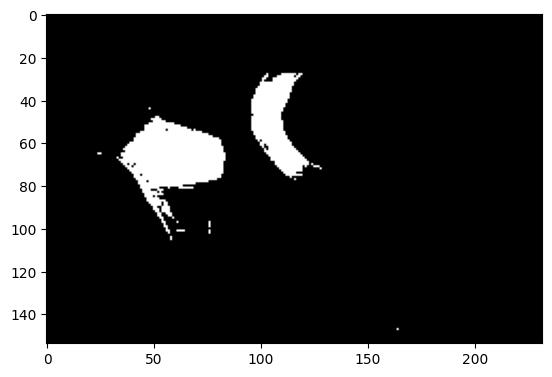

In [11]:
light_white = (0, 0, 200)
dark_white = (145, 60, 255)

mask_white = cv2.inRange(nemo_hsv, light_white, dark_white)
plt.imshow(mask_white, cmap='gray')
plt.show()

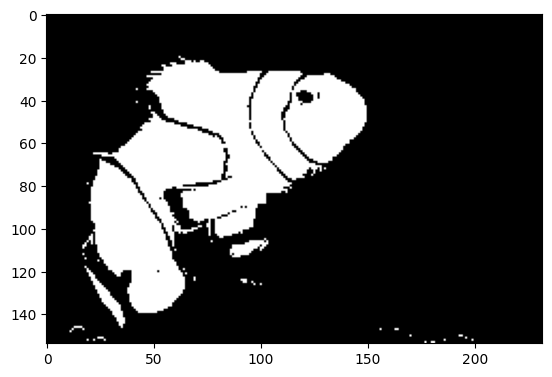

In [13]:
light_black = (0, 0, 0)
dark_black = (350,290,180)

mask_black = cv2.inRange(nemo_hsv, light_black, dark_black)
mask_black = cv2.bitwise_not(mask_black)
plt.imshow(mask_black, cmap='gray')
plt.show()

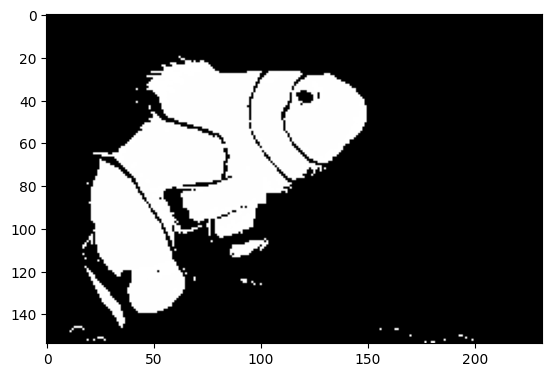

In [14]:
final_mask = mask_orange + mask_white + mask_black
plt.imshow(final_mask, cmap='gray')
plt.show()

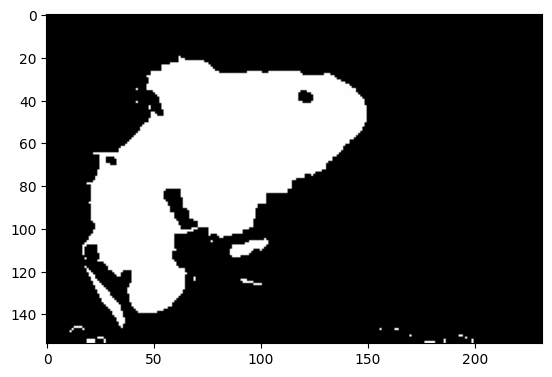

In [40]:
kernel = np.ones((3, 3), np.uint8)
image = cv2.dilate(final_mask , kernel, cv2.BORDER_TRANSPARENT) 
image = cv2.erode(image , kernel, cv2.BORDER_TRANSPARENT) 

plt.imshow(image , cmap="gray" )
plt.show()

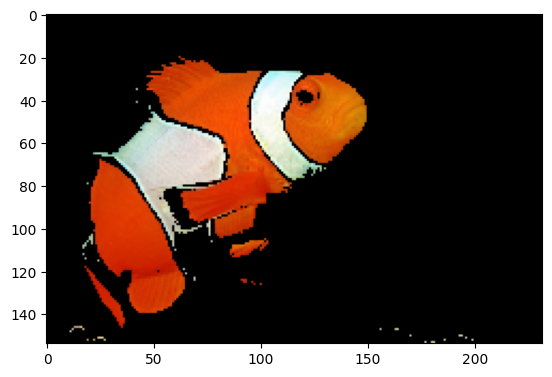

In [25]:
final_result = cv2.bitwise_and(nemo, nemo, mask=final_mask)
plt.imshow(final_result)
plt.show()

Making dataset:

In [22]:
final_mask.shape

(154, 232)

In [23]:
X_train = pixels_list_hsv / 255
X_train.shape

(35728, 3)

In [26]:
Y_train = final_mask.reshape(-1,) // 255
Y_train.shape

(35728,)

In [27]:
Y_train[20000:20100]

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8)

Dataset is ready.

Implementing kNN algorithm:

In [28]:
knn = KNN(k=3)
knn.fit(X_train, Y_train)

In [ ]:
new_pixel = np.array([10, 200, 255]) / 255
knn.predict([new_pixel])

[0]

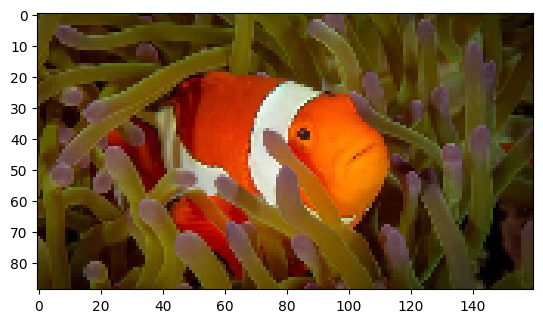

In [39]:
nemo_1 = cv2.imread("input/nemo_1.jpg")
nemo_1 = cv2.resize(nemo_1, (0, 0), fx=0.25, fy=0.25)
nemo_1 = cv2.cvtColor(nemo_1, cv2.COLOR_BGR2RGB)
plt.imshow(nemo_1)
plt.show()

In [35]:
nemo_1_hsv = cv2.cvtColor(nemo_1, cv2.COLOR_RGB2HSV)
nemo_1_hsv.shape

(36, 64, 3)

In [36]:
X_test = nemo_1_hsv.reshape(-1, 3) / 255
X_test.shape

(2304, 3)

In [ ]:
Y_pred = knn.predict(X_test)

In [53]:
output = Y_pred.reshape(nemo_1.shape[:2])
plt.imshow(output, cmap='gray')
plt.show()

In [59]:
nemo_2 = cv2.imread("input/nemo_2.jpg")
nemo_2 = cv2.resize(nemo_2, (0, 0), fx=0.1, fy=0.1)
nemo_2 = cv2.cvtColor(nemo_2, cv2.COLOR_BGR2RGB)
plt.imshow(nemo_2)
plt.show()

In [60]:
nemo_2_hsv = cv2.cvtColor(nemo_2, cv2.COLOR_RGB2HSV)
nemo_2_hsv.shape

(133, 200, 3)

In [62]:
X_test = nemo_2_hsv.reshape(-1, 3) / 255

In [63]:
Y_pred = knn.predict(X_test)

In [66]:
output = Y_pred.reshape(nemo_2.shape[:2])
plt.imshow(output, cmap='gray')
plt.show()

In [67]:
nemo_2.dtype

dtype('uint8')

In [70]:
output.dtype

dtype('uint8')

In [71]:
output = output.astype('uint8')

In [72]:
final_result = cv2.bitwise_and(nemo_2, nemo_2, mask=output)
plt.imshow(final_result)
plt.show()